In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [213]:
df=pd.read_csv("../../survey data/Usability_Testing_of_KU_elf_system_elf_ku_edu_np_ (1).csv")
grade = pd.read_csv("../../Final_Grade/grade_combined.csv")


In [214]:
df=df.drop(df.columns[[0,1,2,3,4,5,8]],axis=1)
# df.head()

index=2
for i in range(index,len(df.columns)):
    df.columns.values[i]=f"Q{i-1}"

df['Full name'] = df['Full name'].str.lower()

df.head()


ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10
0  148  rikesh karmacharya   3   3   2   1   4   2   3   2   3    1
1  442      bibhusan baral   4   3   4   2   4   4   4   3   2    2
2  473        satyam karki   4   2   4   2   4   2   4   3   4    2
3  478    shubh raj dhital   5   2   5   1   5   2   4   2   5    2
4  525      roshan shreesh   3   1   4   1   4   4   3   1   4    2

In [215]:
inversion=[2,4,6,8,10]

def invert_score(x):
    if x==1:return 5
    if x==2:return 4
    if x==3:return 3
    if x==4:return 2
    if x==5:return 1

for i in inversion :
    df.iloc[:,i+1]=df.iloc[:,i+1].apply(invert_score)

df.head()

ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10
0  148  rikesh karmacharya   3   3   2   5   4   4   3   4   3    5
1  442      bibhusan baral   4   3   4   4   4   2   4   3   2    4
2  473        satyam karki   4   4   4   4   4   4   4   3   4    4
3  478    shubh raj dhital   5   4   5   5   5   4   4   4   5    4
4  525      roshan shreesh   3   5   4   5   4   2   3   5   4    4

In [216]:
df["score"]=df.iloc[:,2:11].mean(axis=1)
df["round"]=df["score"].apply(lambda x: round(x))
df.head()

ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10     score  \
0  148  rikesh karmacharya   3   3   2   5   4   4   3   4   3    5  3.444444   
1  442      bibhusan baral   4   3   4   4   4   2   4   3   2    4  3.333333   
2  473        satyam karki   4   4   4   4   4   4   4   3   4    4  3.888889   
3  478    shubh raj dhital   5   4   5   5   5   4   4   4   5    4  4.555556   
4  525      roshan shreesh   3   5   4   5   4   2   3   5   4    4  3.888889   

   round  
0      3  
1      3  
2      4  
3      5  
4      4

In [217]:
df['Name'] = df['Full name'].str.lower()
df = df.drop(columns=['Full name'])

<Axes: xlabel='score', ylabel='Density'>

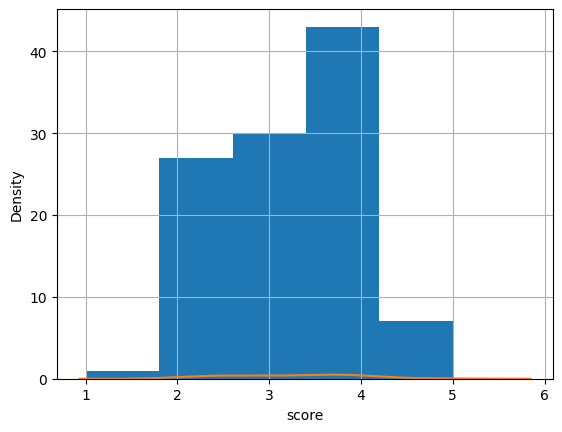

In [218]:
import matplotlib as plt
import seaborn as sns

df["score"].hist(bins=5,range=(1,5))
sns.kdeplot(df['score'],label="Density")


<Axes: xlabel='score', ylabel='Density'>

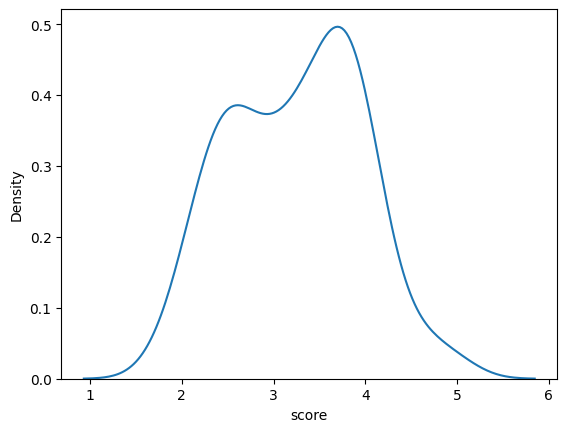

In [219]:
sns.kdeplot(df['score'],label="Density")

## Grade combined with elf acceptance

In [220]:
# Define a dictionary to map old names to new names
name_changes = {
    'ankit kumar karna': 'ankit karna',
    'anup raj niroula': 'anup niroula',
    'hrishav raghu shrestha': 'hrishav shrestha',
    'aadil tuladhar': 'adil tuladhar',
    'nischal chand': 'nischal thakuri',
    'shreeyash laya-la shrestha': 'shreeyash shrestha',
}

# Apply the name changes
elf_grade['Name'] = elf_grade['Name'].replace(name_changes)


In [221]:
# Merge dataframes on the 'Name' column
elf_grade = pd.merge(df, grade[['Name', 'Score', 'GRADE']], on='Name', how='left')

In [222]:

elf_grade['grade_score'] = elf_grade['Score']
elf_grade = elf_grade.drop(columns=['Score'])

In [223]:
elf_grade.isna().sum()

ID             0
Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
score          0
round          0
Name           0
GRADE          0
grade_score    0
dtype: int64

In [224]:
nan_grades = elf_grade[elf_grade['GRADE'].isna()]
print("\nStudents without grades:")
print(nan_grades['Name'])


Students without grades:
Series([], Name: Name, dtype: object)


There were some name inconsistent between name in grade and in the survey data

In [225]:
elf_grade

ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10     score  round  \
0     148   3   3   2   5   4   4   3   4   3    5  3.444444      3   
1     442   4   3   4   4   4   2   4   3   2    4  3.333333      3   
2     473   4   4   4   4   4   4   4   3   4    4  3.888889      4   
3     478   5   4   5   5   5   4   4   4   5    4  4.555556      5   
4     525   3   5   4   5   4   2   3   5   4    4  3.888889      4   
..    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...    ...   
103  2255   4   4   4   4   3   4   2   4   3    3  3.555556      4   
104  2256   3   4   4   4   3   4   4   4   4    4  3.777778      4   
105  2257   5   2   4   4   2   2   3   2   3    3  3.000000      3   
106  2258   1   3   3   4   2   3   2   2   2    4  2.444444      2   
107  2260   1   2   2   2   2   3   2   3   3    4  2.222222      2   

                   Name GRADE  grade_score  
0    rikesh karmacharya    A-         76.0  
1        bibhusan baral     A         80.0  
2          satyam karki    A-         75.0  
3      shubh raj dhital     B         67.0  
4        roshan shreesh    C+         55.0  
..                  ...   ...          ...  
103      minusha gurung    A-         78.0  
104       pratik khadka    A-         75.0  
105        niraj tamang    B+         74.0  
106         bishal shah    A-         78.0  
107     asmita dhungana    A-         79.0  

[108 rows x 16 columns]

In [226]:
## SCORE for Learner Type

In [227]:
# Group by 'round' and calculate the 'average_elf_score'

# Group by 'round' and calculate the mean, max, min, Q1, and Q3 'Score'
aggregated_scores = elf_grade.groupby('round')['grade_score'].agg(['mean', 'max', 'min', 'quantile', lambda x: x.quantile(0.75)]).reset_index()


# Rename columns for better readability
aggregated_scores = aggregated_scores.rename(columns={
    'round' : 'ELF Score',
    'mean': 'Average_Score',
    'max': 'Highest_Score',
    'min': 'Lowest_Score',
    'quantile': 'Q1_Score',
    '<lambda_0>': 'Q3_Score'
})

# Display the resulting dataframe
print(aggregated_scores)

   ELF Score  Average_Score  Highest_Score  Lowest_Score  Q1_Score  Q3_Score
0          2      77.400000           91.0          66.0      77.5      79.0
1          3      76.761905           92.0          60.0      76.5      80.0
2          4      75.487805           92.0          55.0      76.0      79.0
3          5      74.600000           79.0          67.0      77.0      77.0


In [228]:
# Define function to map scores to grades
def assign_grade(score):
    if score >= 80:
        return 'A'
    elif 75 <= score < 80:
        return 'A-'
    elif 70 <= score < 75:
        return 'B+'
    elif 65 <= score < 70:
        return 'B'
    elif 60 <= score < 65:
        return 'B-'
    elif 55 <= score < 60:
        return 'C+'
    elif 50 <= score < 55:
        return 'C'
    elif 45 <= score < 50:
        return 'C-'
    else:
        return 'F'

In [229]:

# Apply the function to the 'Score' column to create the 'Average_Grade' column
aggregated_scores['Average_Grade'] = aggregated_scores['Average_Score'].apply(assign_grade)


In [230]:
aggregated_scores

ELF Score  Average_Score  Highest_Score  Lowest_Score  Q1_Score  Q3_Score  \
0          2      77.400000           91.0          66.0      77.5      79.0   
1          3      76.761905           92.0          60.0      76.5      80.0   
2          4      75.487805           92.0          55.0      76.0      79.0   
3          5      74.600000           79.0          67.0      77.0      77.0   

  Average_Grade  
0            A-  
1            A-  
2            A-  
3            B+

# Model Training and Evaluation

## Using Regression Model

### Linear Regression Model

In [231]:

def train_linear_regression(X_train, y_train):
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

### Random Forest Model

In [232]:
def train_random_forest(X_train, y_train):
    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model


### Evaluation

In [233]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    
    #mean square error
    mse = mean_squared_error(y_test, y_pred)
    
    #r2 score
    r2 = r2_score(y_test, y_pred)

    return mse, r2, y_pred

### Visual Plot

In [234]:
# Function to plot the results
def plot_results(X_test, y_test, y_pred, title):
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Survey Score')
    plt.ylabel('Grade Score')
    plt.legend()
    plt.show()

### Split Data with Train and Test

In [235]:
def split_data(df, test_size=0.2, random_state=42):
    X = df[['score']]
    y = df['grade_score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

### Implementing Model and evaluation

Linear Regression MSE: 44.99, R2: 0.01


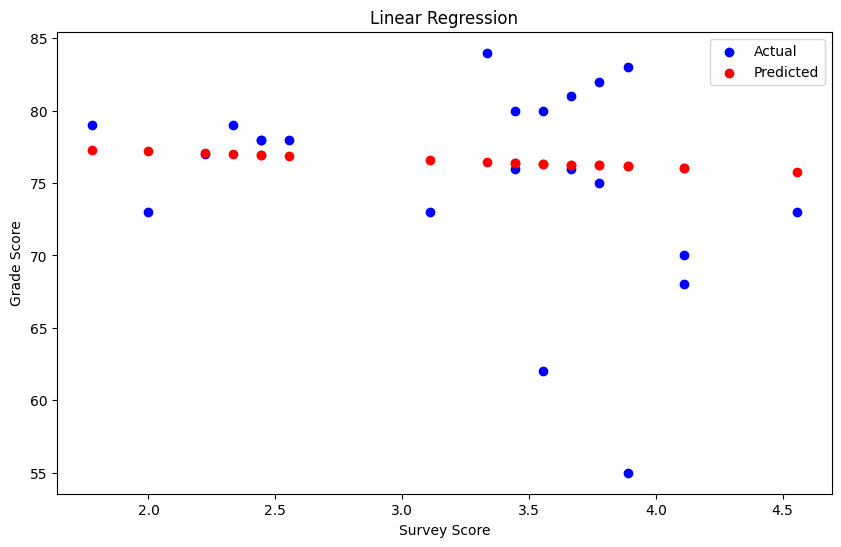

Random Forest Regression MSE: 73.56, R2: -0.63


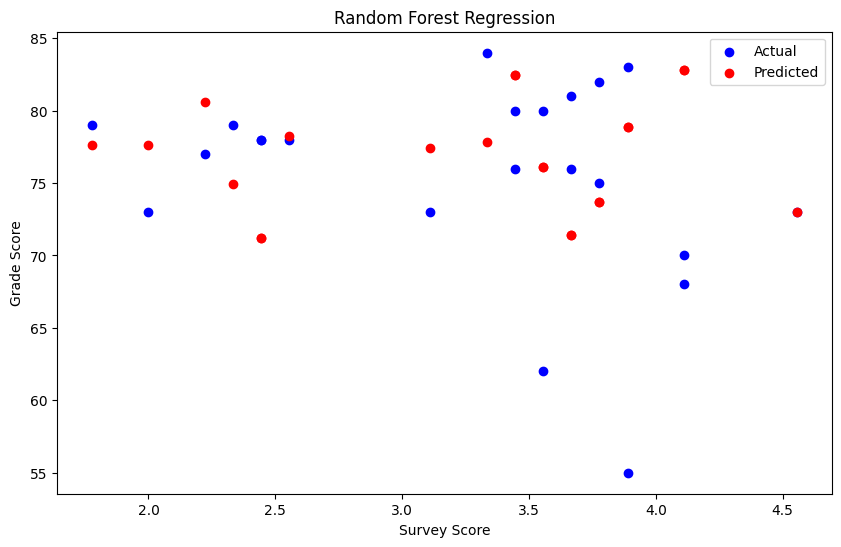

In [236]:
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = split_data(elf_grade)

# Train and evaluate Linear Regression
lr_model = train_linear_regression(X_train, y_train)
mse_lr, r2_lr, y_pred_lr = evaluate_model(lr_model, X_test, y_test)
print(f'Linear Regression MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}')
plot_results(X_test, y_test, y_pred_lr, 'Linear Regression')

# Train and evaluate Random Forest Regression
rf_model = train_random_forest(X_train, y_train)
mse_rf, r2_rf, y_pred_rf = evaluate_model(rf_model, X_test, y_test)
print(f'Random Forest Regression MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}')
plot_results(X_test, y_test, y_pred_rf, 'Random Forest Regression')

## Using CLassification Models

### logistic Regression

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def train_and_test_classification_model(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the classification model
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Test the model
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

# Use grades as features and rounded survey scores as labels
X = elf_grade[['grade_score']]
y = elf_grade['round']

# Train and test the classification model
accuracy, report = train_and_test_classification_model(X, y)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 0.27
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         6
           3       0.24      1.00      0.38         5
           4       1.00      0.10      0.18        10
           5       0.00      0.00      0.00         1

    accuracy                           0.27        22
   macro avg       0.31      0.28      0.14        22
weighted avg       0.51      0.27      0.17        22



/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

The logistic regression model achieved an accuracy of 0.64 on the test data. However, the classification report reveals that the model performs poorly on certain classes. For instance, it fails to predict any instances of class 3 and class 5, resulting in precision, recall, and F1-score of 0.00 for these classes. The model performs relatively better on class 4 with a precision of 0.67 and recall of 0.93.

It's important to note the warning messages regarding precision being ill-defined due to no predicted samples for certain classes. This indicates that the model may require further optimization or alternative approaches to improve its performance, especially for the minority classes.

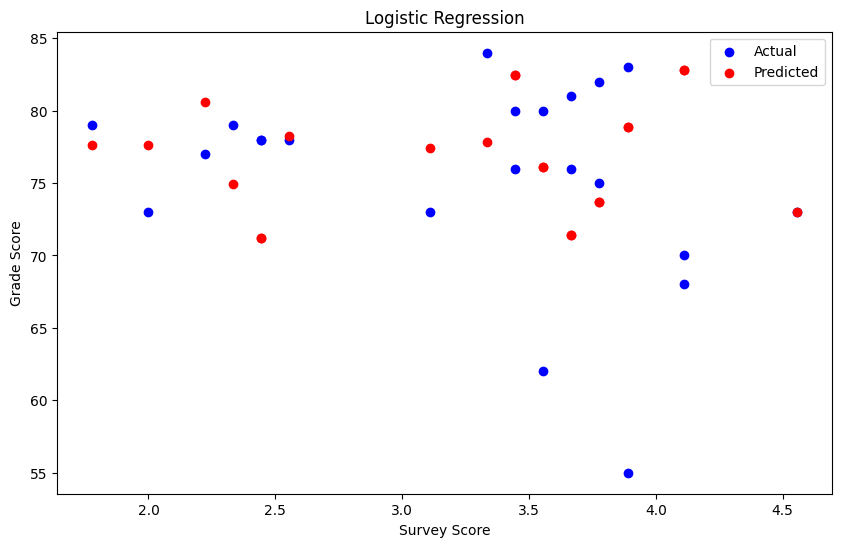

In [238]:
plot_results(X_test, y_test, y_pred_rf, 'Logistic Regression')

### SVM and GradientBoostingRegressor

Support Vector Regression MSE: 49.76, R2: -0.10


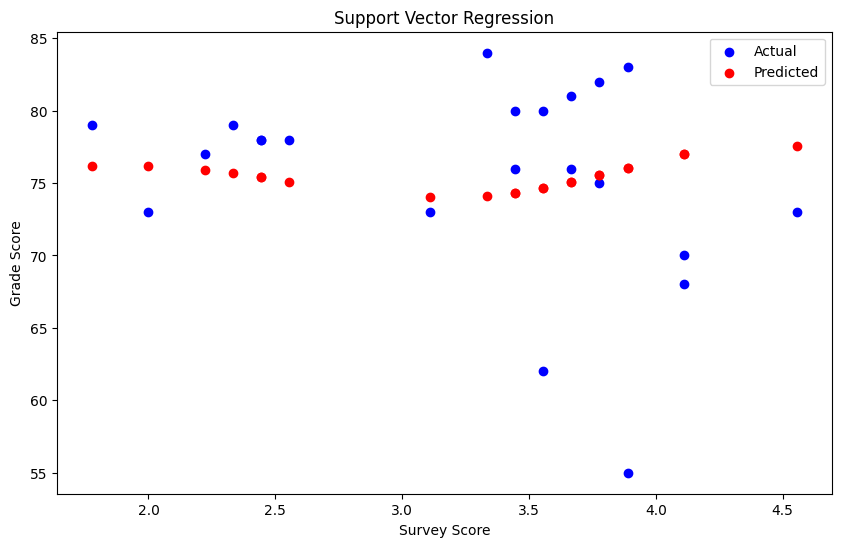

Gradient Boosting Regression MSE: 74.25, R2: -0.64


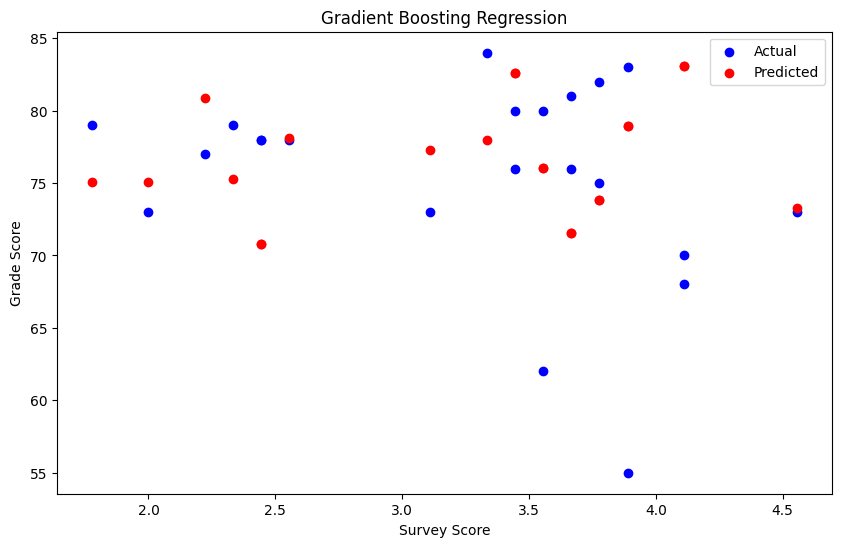

In [239]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Function to train Support Vector Regression
def train_svr(X_train, y_train):

    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)
    return model

# Function to train Gradient Boosting Regression
def train_gradient_boosting(X_train, y_train):
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Split the data
X_train, X_test, y_train, y_test = split_data(elf_grade)

# Train and evaluate Support Vector Regression
svr_model = train_svr(X_train, y_train)
mse_svr, r2_svr, y_pred_svr = evaluate_model(svr_model, X_test, y_test)
print(f'Support Vector Regression MSE: {mse_svr:.2f}, R2: {r2_svr:.2f}')

# Plot results for Support Vector Regression
plot_results(X_test, y_test, y_pred_svr, 'Support Vector Regression')

# Train and evaluate Gradient Boosting Regression
gb_model = train_gradient_boosting(X_train, y_train)
mse_gb, r2_gb, y_pred_gb = evaluate_model(gb_model, X_test, y_test)
print(f'Gradient Boosting Regression MSE: {mse_gb:.2f}, R2: {r2_gb:.2f}')

# Plot results for Gradient Boosting Regression
plot_results(X_test, y_test, y_pred_gb, 'Gradient Boosting Regression')

# Findings and Discussions

#### Regression Models Analysis:
The results indicate that the regression models evaluated on the ELF survey data exhibit poor performance in capturing the variance in the data, as evident from the negative R² values for most models. However, the Linear Regression model achieved a slightly positive R² value of 0.01, suggesting minimal explanatory power.
Among the regression models, Linear Regression performed the best with the lowest Mean Squared Error (MSE) of 44.99, followed by Support Vector Regression (SVR) with an MSE of 49.76. Random Forest Regression and Gradient Boosting Regression exhibited significantly higher MSE values of 73.56 and 74.25, respectively, indicating poorer performance compared to Linear Regression and SVR.

|Model|MSE|R²|
|:-----|:---|:--|
|Linear Regression|44.99|0.01|
|Random Forest Regression|73.56|-0.63|
|Support Vector Regression|49.76|-0.10|
|Gradient Boosting Regression|74.25|-0.64|

#### Logistic Regression:
The Logistic Regression model yielded an overall low accuracy of 0.27, indicating significant challenges in correctly classifying the instances in the ELF survey data. The class-wise performance metrics reveal several issues:

* Class 2 and Class 5 had zero precision and recall, suggesting that the model completely failed to identify instances belonging to these classes correctly.
* Class 4 had perfect precision (1.00) but low recall (0.10), implying that while the model was accurate in predicting instances as Class 4 when it did so, it missed many instances that should have been classified as Class 4.
* Class 3 had moderate precision (0.24) and perfect recall (1.00), indicating that the model tended to overpredict this class, resulting in many false positives.

The macro-averaged metrics, which treat all classes equally, show a low precision of 0.31, recall of 0.27, and F1-score of 0.14, further highlighting the poor overall performance of the Logistic Regression model on this dataset.
|Metric|Class 2|Class 3|Class 4|Class 5|Accuracy|Macro Avg|Weighted Avg|
|-----|---|--|-----|---|--|-----|---|
|Precision|0.00|0.24|1.00|0.00|0.27|0.31|0.51|
|Recall|0.00|1.00|0.10|0.00|-|0.28|0.27|
|F1-Score|0.00|0.38|0.18|0.00|-|0.14|0.17|
|Support|6|5|10|1|22|22|22|

#### Discussion
Based on the results presented, both the regression models and the Logistic Regression model exhibited poor performance on the ELF survey data. Among the regression models, Linear Regression performed the best, achieving a slightly positive R² value of 0.01 and the lowest Mean Squared Error (MSE) of 44.99. However, even the best-performing regression model had minimal explanatory power for the variance in the data.
The Logistic Regression model yielded an overall low accuracy of 0.27, indicating significant challenges in correctly classifying instances in the ELF survey data. The class-wise performance metrics revealed that the model completely failed to identify instances belonging to classes 2 and 5, overpredicted class 3, and had low recall for class 4, despite perfect precision.